[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_16_Analise_de_Componentes_Principais.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_16_Analise_de_Componentes_Principais.ipynb)

# Análise de Componentes Principais (*Principal Components Analysis*) - PCA

**Objetivos**: Introduzir técnicas de redução de dimensão. Aprender o que é Análise de Componentes Principais usando a biblioteca `Scikit-Learn`.

## O que é Análise de Componentes Principais (PCA)?

Uma técnica de **redução de dimensão** de atributos (colunas de um conjunto de dados) que usa álgebra linear para identificar vetores (geralmente em um número menor que os vetores de atributos originais do dataset) que conseguem representar os dados com a menor perda possível de informação.

Faz com que $N$ atributos se transformem em $D < N$ atributos.

<img src="images/PCA.png" alt="PCA" style="width: 600px;"/>

## Quantos Componentes?

* Definido pela quantidade de variância explicada
* Arbitrariamente, por exemplo 95%

## Scikit-Learn

Usar a função [`sklearn.decomposition.PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Argumentos:
* `n_components` - `int` - Número de Componentes a ser extraído
    * Se não for especificado, extrai todos os componentes
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

### Retorna:
* Objeto `estimator` do Scikit-Learn
    * `.explained_variance_ratio_`: Porcentagem de variação explicada por cada um dos componentes.

## Dataset [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris  (Setosa, Virginica e Iris Versicolor). Quatro características foram medidas em cada amostra (cm):

* comprimento das sépalas
* largura  das sépalas
* comprimento das pétalas
* largura das pétalas

<img src="images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset('iris')
y = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica':2})
iris.drop(['species'], axis=1, inplace=True)

2 componentes

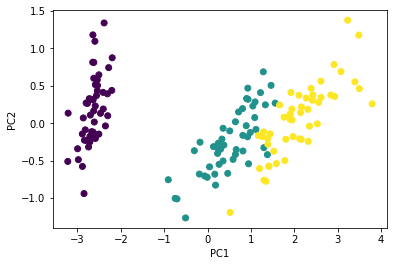

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
iris_2D = pca.fit_transform(iris)
plt.scatter(iris_2D[:, 0], iris_2D[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [3]:
for number, component in zip(range(0,len(pca.explained_variance_ratio_)),
                             pca.explained_variance_ratio_):
    print(f"Variância Explicada pelo Componente {number + 1}: {round(component, 2) * 100}%")

Variância Explicada pelo Componente 1: 92.0%
Variância Explicada pelo Componente 2: 5.0%


1 componente

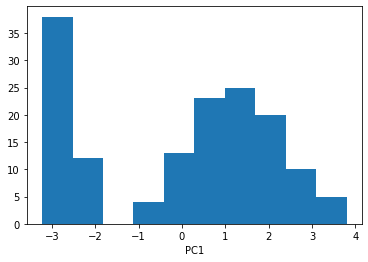

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
iris_1D = pca.fit_transform(iris)
plt.hist(iris_1D)
plt.xlabel('PC1')
plt.show()

## Exemplo com Alta Dimensionalidade

### Dataset [Digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#the-digit-dataset)

Uma compilação de 1.797 imagens preto e branco, 8x8 pixels, de dígitos escritos a mão.

Número de Colunas: 64


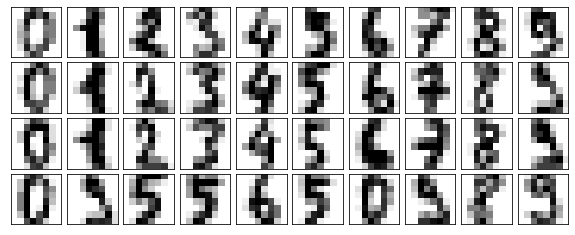

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
print('Número de Colunas:', digits.data.shape[1])  # 64 dimensões

fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8, 8),
              cmap='binary', interpolation='nearest',
              clim=(0, 16))

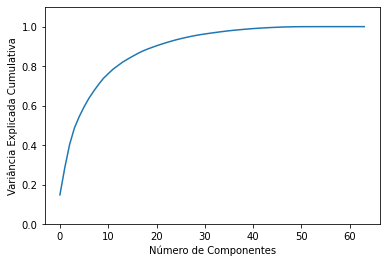

In [6]:
pca2 = PCA().fit(digits.data)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.ylim(0,1.1)
plt.show()

In [7]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

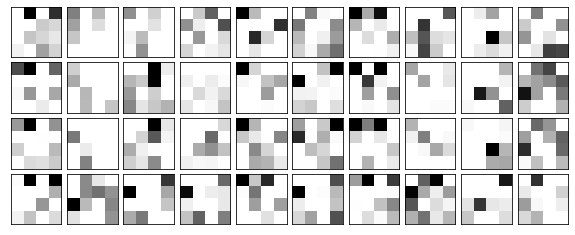

In [8]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca2.transform(digits.data)[i, :16].reshape(4, 4),
              cmap='binary', interpolation='nearest',
              clim=(0, 16))